In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay

In [20]:
X_AXIS = 'nilai autograder'
Y_AXIS = 'nilai manual'
EPS = 0.001

import os 
import sys

module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path) 
    
from grader.src.ged.classes.general_cost_function import RelabelMethod
from grader.src.grader import Grader, GraphPreprocessType

REAL_GRADE_FILENAME = 'Real Results.csv' 
AFILE_PREFIX = 'Grade Results_'
def get_afilename(s):
    return f'{AFILE_PREFIX}{s}'

real_dataframe = pd.read_csv(REAL_GRADE_FILENAME)
dataframes = {}
for node_cost in range(1, 4):
    for edge_cost in range(1, 4):
        if node_cost == edge_cost and node_cost != 1:
            continue
        for relabel_method in RelabelMethod.__iter__():
            for graph_preprocess_type in GraphPreprocessType.__iter__():
                filename = get_afilename(f'{relabel_method.name}_{graph_preprocess_type.name}_C{node_cost}{edge_cost}.csv')
                if filename not in os.listdir('./'):
                    continue
                print(filename)
                dataframes[filename] = pd.read_csv(filename).rename(columns={'grade': 'nilai autograder'})
                dataframes[filename] = pd.merge(dataframes[filename], real_dataframe, on=['nim', 'exam_name', 'number'])

# dataframe = [df for df in dataframes.values()][0]
# print(dataframe[:5])
# # dataframe = dataframe.set_index('nim').join(real_dataframe.set_index('nim'), on='nim')
# dataframe = pd.merge(dataframe, real_dataframe, on=['nim', 'exam_name', 'number'], )
# print(dataframe[:5])

Grade Results_NONE_UNCOLLAPSE_C11.csv
Grade Results_NONE_COLLAPSE_C11.csv
Grade Results_NONE_PROPAGATE_BRANCHING_C11.csv
Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C11.csv
Grade Results_BOOLEAN_COUNT_COLLAPSE_C11.csv
Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C11.csv
Grade Results_COUNTER_UNCOLLAPSE_C11.csv
Grade Results_COUNTER_COLLAPSE_C11.csv
Grade Results_COUNTER_PROPAGATE_BRANCHING_C11.csv
Grade Results_DAMERAU_LD_UNCOLLAPSE_C11.csv
Grade Results_DAMERAU_LD_COLLAPSE_C11.csv
Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C11.csv
Grade Results_EXACT_UNCOLLAPSE_C11.csv
Grade Results_EXACT_COLLAPSE_C11.csv
Grade Results_EXACT_PROPAGATE_BRANCHING_C11.csv
Grade Results_NONE_UNCOLLAPSE_C12.csv
Grade Results_NONE_COLLAPSE_C12.csv
Grade Results_NONE_PROPAGATE_BRANCHING_C12.csv
Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C12.csv
Grade Results_BOOLEAN_COUNT_COLLAPSE_C12.csv
Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C12.csv
Grade Results_COUNTER_UNCOLLAPSE_C12.csv
Grade Results_NONE_UNCOLLAPS

In [21]:
# Correlation function
def correlation(df):
    return df.corr()

In [22]:
# MAE (Mean Absolute Error) function
def mae(df):
    return mean_absolute_error(df[X_AXIS], df[Y_AXIS])

In [23]:
# Linear Regression Plot function
def linear_regression_plot(name, df):
    m, b = np.polyfit(df[X_AXIS], df[Y_AXIS], 1)
    print(f'Info for plot={name}: m={m}, b={b}')
    fig, ax = plt.subplots(figsize=(8, 8), dpi=60)
    ax.scatter(df[X_AXIS], df[Y_AXIS])
    ax.set_title(f'Perbandingan Hasil Penilaian Menggunakan Sistem Autograder\n dan Hasil Penilaian Manual oleh Pendidik\n{name}')
    ax.set_xlabel('Hasil Penilaian Menggunakan Sistem Autograder')
    ax.set_ylabel('Hasil Penilaian Manual oleh Pendidik')
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.set_aspect(1)
    ax.plot(df[Y_AXIS], m * df[Y_AXIS] + b)
    plt.show()

In [24]:
# Confusion Matrix Plot function
def confusion_matrix_plot(name, df):
    bins = [10 * x - EPS for x in range(11)] + [100 + EPS]
    labels = range(11)

    cat_X = pd.cut(df[X_AXIS], bins=bins, labels=labels)
    cat_Y = pd.cut(df[Y_AXIS], bins=bins, labels=labels)
    categorized_grade = pd.concat([cat_X, cat_Y], axis=1)
    
    cm = confusion_matrix(categorized_grade[X_AXIS], categorized_grade[Y_AXIS], labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(10, 8), dpi=60)
    ax.set_title(f'Confusion Matrix Perbandingan Hasil Penilaian Menggunakan Sistem Autograder\n dan Hasil Penilaian Manual oleh Pendidik\n{name}')
    disp.plot(ax=ax)
    disp.ax_.set(xlabel=X_AXIS, ylabel=Y_AXIS)
    plt.show()

In [25]:
# Print Correlations
for name, df in dataframes.items():
    print(f'Correlation of dataframe {name} exam:\n', correlation(df), '\n-----\n')

Correlation of dataframe Grade Results_NONE_UNCOLLAPSE_C11.csv exam:
                        nim  nilai autograder  nilai manual
nim               1.000000         -0.027346     -0.059066
nilai autograder -0.027346          1.000000      0.716872
nilai manual     -0.059066          0.716872      1.000000 
-----

Correlation of dataframe Grade Results_NONE_COLLAPSE_C11.csv exam:
                        nim  nilai autograder  nilai manual
nim               1.000000         -0.006338     -0.059066
nilai autograder -0.006338          1.000000      0.624281
nilai manual     -0.059066          0.624281      1.000000 
-----

Correlation of dataframe Grade Results_NONE_PROPAGATE_BRANCHING_C11.csv exam:
                        nim  nilai autograder  nilai manual
nim               1.000000         -0.044643     -0.059066
nilai autograder -0.044643          1.000000      0.573450
nilai manual     -0.059066          0.573450      1.000000 
-----

Correlation of dataframe Grade Results_BOOLEAN_COUN

In [26]:
# Print MAE
for name, df in dataframes.items():
    print(f'MAE (Mean Absolute Error) of dataframe {name} exam: {mae(df)}')

MAE (Mean Absolute Error) of dataframe Grade Results_NONE_UNCOLLAPSE_C11.csv exam: 17.6393929743003
MAE (Mean Absolute Error) of dataframe Grade Results_NONE_COLLAPSE_C11.csv exam: 22.255339751943826
MAE (Mean Absolute Error) of dataframe Grade Results_NONE_PROPAGATE_BRANCHING_C11.csv exam: 24.618864296256177
MAE (Mean Absolute Error) of dataframe Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C11.csv exam: 17.00562644031856
MAE (Mean Absolute Error) of dataframe Grade Results_BOOLEAN_COUNT_COLLAPSE_C11.csv exam: 17.515894831407692
MAE (Mean Absolute Error) of dataframe Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C11.csv exam: 18.838175661912246
MAE (Mean Absolute Error) of dataframe Grade Results_COUNTER_UNCOLLAPSE_C11.csv exam: 17.00562644031856
MAE (Mean Absolute Error) of dataframe Grade Results_COUNTER_COLLAPSE_C11.csv exam: 17.644675105798054
MAE (Mean Absolute Error) of dataframe Grade Results_COUNTER_PROPAGATE_BRANCHING_C11.csv exam: 19.12320520833571
MAE (Mean Absolute Error) of d

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C11.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C11.csv: m=0.4797739241913595, b=32.04010579179674


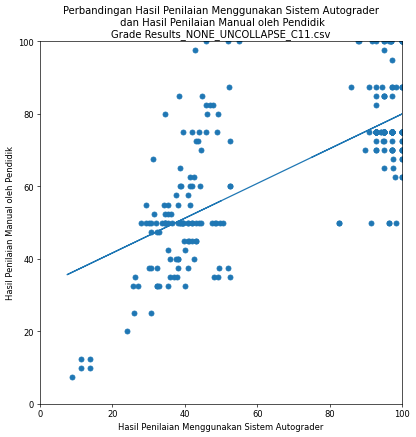

Linear Regression Plot of Grade Results_NONE_COLLAPSE_C11.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_C11.csv: m=0.5063219688700653, b=23.83569015633699


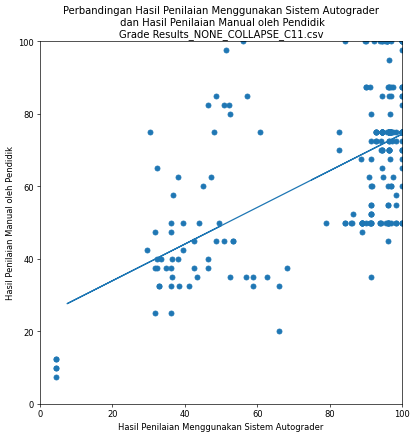

Linear Regression Plot of Grade Results_NONE_PROPAGATE_BRANCHING_C11.csv exam:
Info for plot=Grade Results_NONE_PROPAGATE_BRANCHING_C11.csv: m=0.6430932378527648, b=9.51435253528305


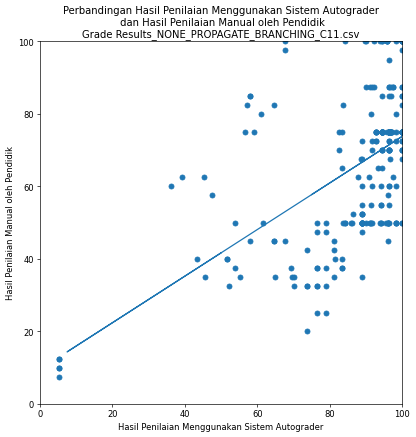

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C11.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C11.csv: m=0.49370250202693516, b=31.883122099830704


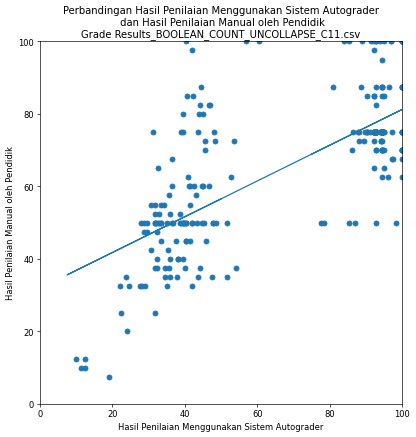

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_C11.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_C11.csv: m=0.5245647064024109, b=26.1025823068749


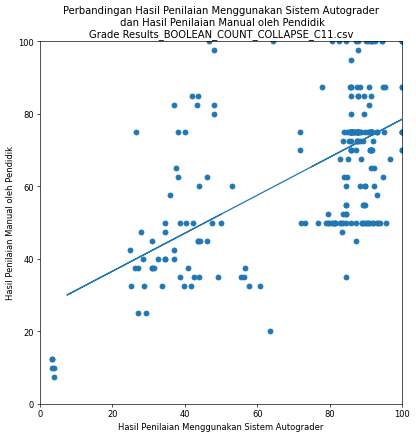

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C11.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C11.csv: m=0.6961784825215419, b=9.71976993872681


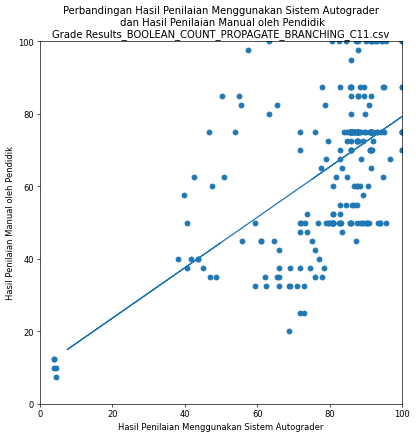

Linear Regression Plot of Grade Results_COUNTER_UNCOLLAPSE_C11.csv exam:
Info for plot=Grade Results_COUNTER_UNCOLLAPSE_C11.csv: m=0.49370250202693516, b=31.883122099830704


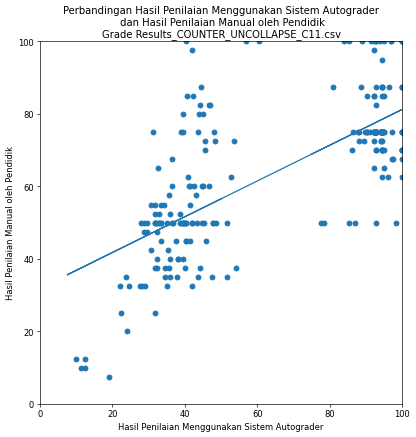

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_C11.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_C11.csv: m=0.5328001304855625, b=25.291019515492255


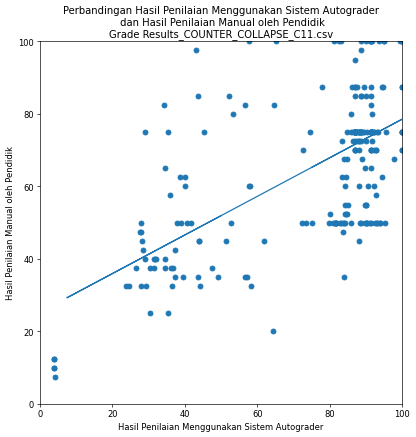

Linear Regression Plot of Grade Results_COUNTER_PROPAGATE_BRANCHING_C11.csv exam:
Info for plot=Grade Results_COUNTER_PROPAGATE_BRANCHING_C11.csv: m=0.6622650571178569, b=12.41526011719438


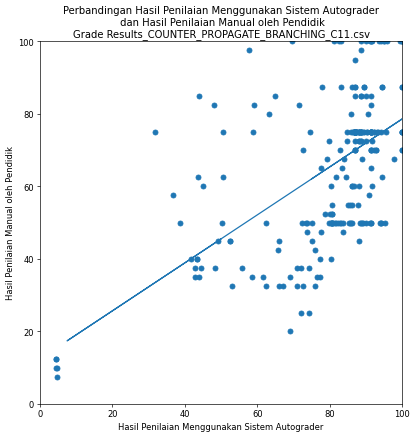

Linear Regression Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C11.csv exam:
Info for plot=Grade Results_DAMERAU_LD_UNCOLLAPSE_C11.csv: m=0.49370250202693516, b=31.883122099830704


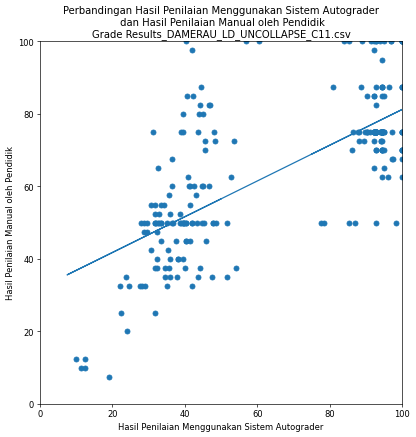

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_C11.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_C11.csv: m=0.5149200324639517, b=26.963008194674178


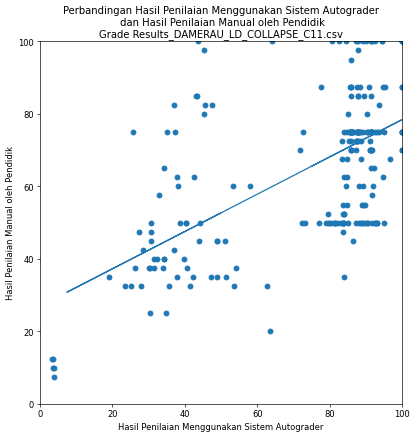

Linear Regression Plot of Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C11.csv exam:
Info for plot=Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C11.csv: m=0.6553763234333416, b=13.569259804009878


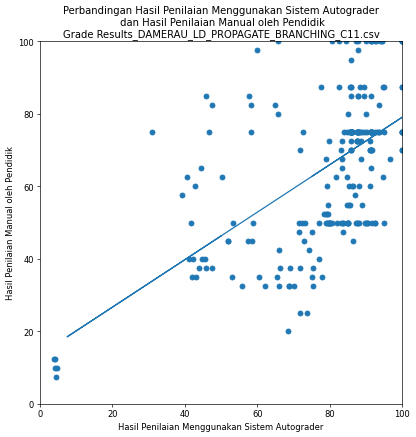

Linear Regression Plot of Grade Results_EXACT_UNCOLLAPSE_C11.csv exam:
Info for plot=Grade Results_EXACT_UNCOLLAPSE_C11.csv: m=0.4939103956138316, b=31.888160726085253


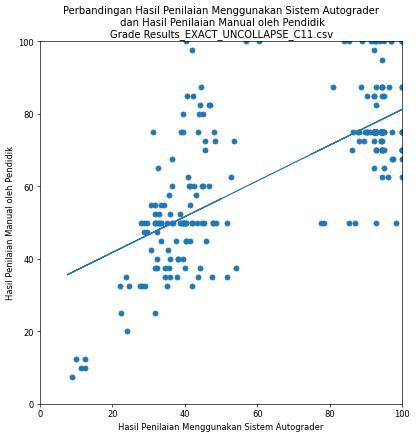

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_C11.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_C11.csv: m=0.5350640399308908, b=26.622946116743588


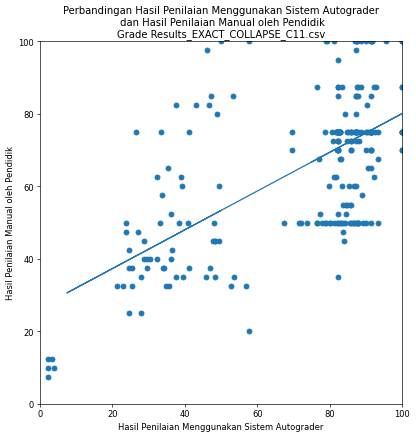

Linear Regression Plot of Grade Results_EXACT_PROPAGATE_BRANCHING_C11.csv exam:
Info for plot=Grade Results_EXACT_PROPAGATE_BRANCHING_C11.csv: m=0.6411784181616009, b=15.907998511917924


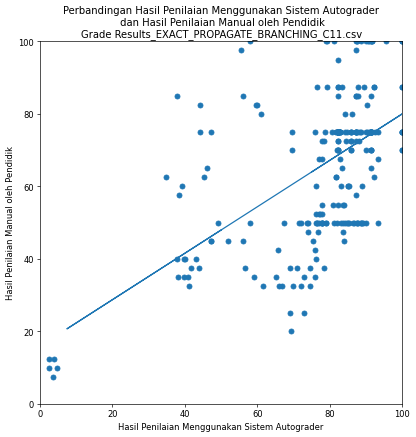

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C12.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C12.csv: m=0.3932077502415272, b=39.62532412797824


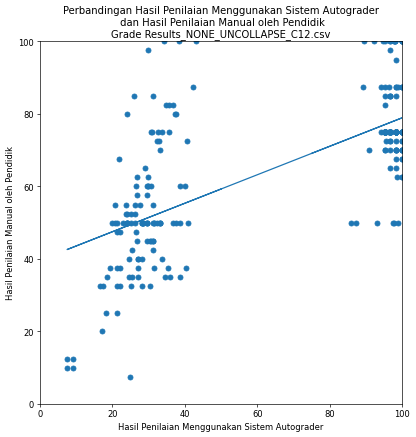

Linear Regression Plot of Grade Results_NONE_COLLAPSE_C12.csv exam:


D:\_Semester8\Tugas Akhir\GED\cfg-grader\.venv\lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

In [27]:
# Show Linear Regression Plot
for name, df in dataframes.items():
    print(f'Linear Regression Plot of {name} exam:')
    linear_regression_plot(name, df)

Confusion Matrix Plot of kuis2_IA exam:


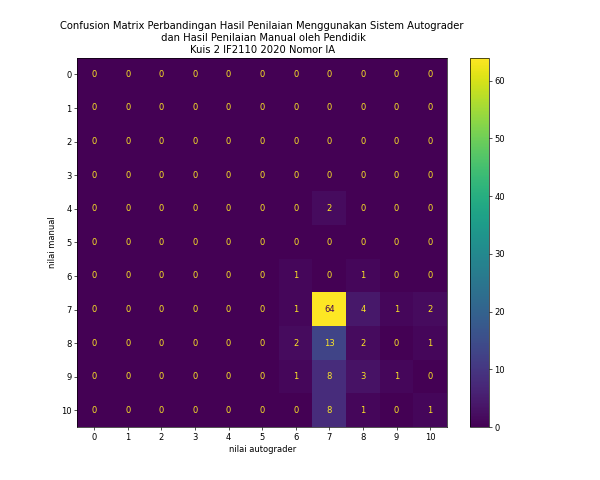

Confusion Matrix Plot of kuis2_IB exam:


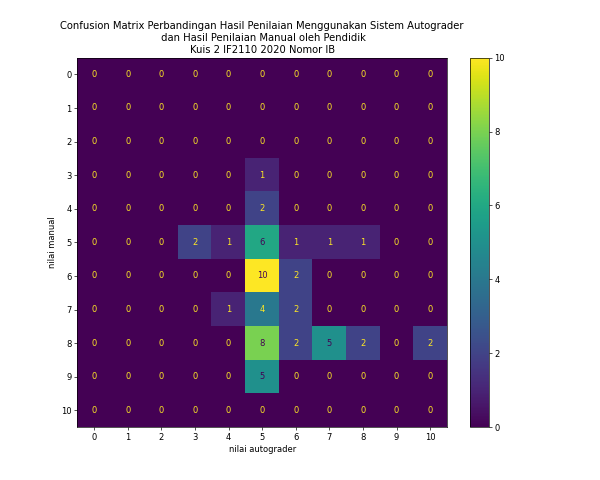

Confusion Matrix Plot of kuis2_IC exam:


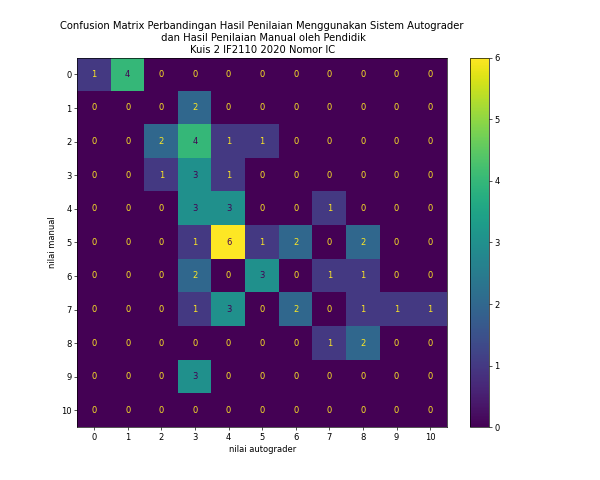

Confusion Matrix Plot of uts_IA exam:


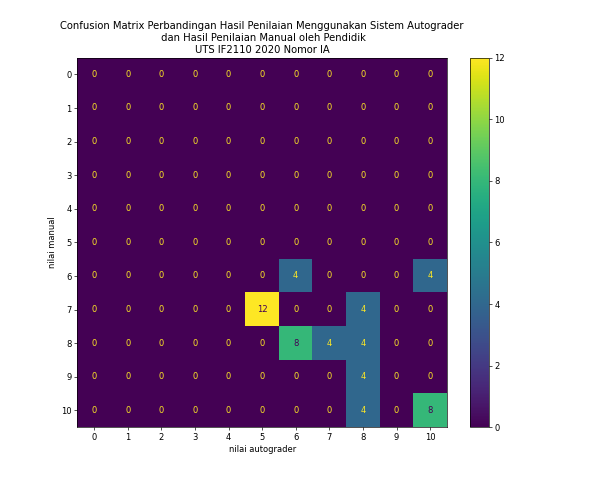

Confusion Matrix Plot of uts_IB exam:


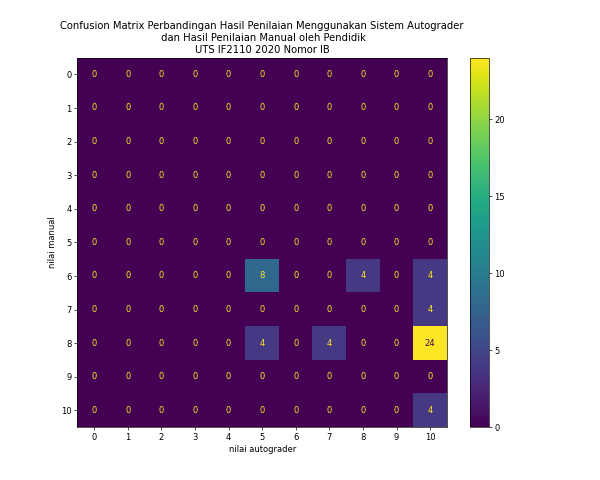

Confusion Matrix Plot of all exam:


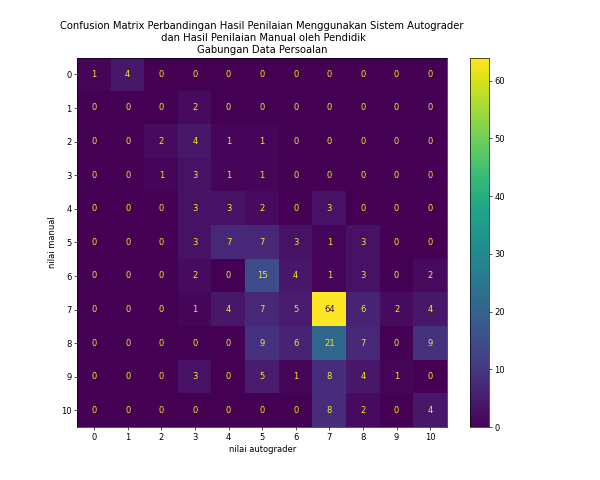

In [11]:
# Show Confusion Matrix Plot
for name, df in dataframes.items():
    print(f'Confusion Matrix Plot of {name} exam:')
    confusion_matrix_plot(name, df)